In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gom = pd.read_csv('GOM data.csv')

In [3]:
gom.head(2)

,Depth (ft),Density (g/cm^3),Overburden stress (psi),Hydrostatic pore pressure (psi),Overburden gradient (psi/ft),Porosity (-)
0,1,1.0,0.438350,0.44,0.43835,1.0
1,2,1.0,0.876701,0.88,0.43835,1.0


In [4]:
gom.rename(columns = lambda x: x.strip(), inplace=True)

In [5]:
phi_0 = 0.4
beta = 0.0002 # psi/ft

def phi(sigma_e, phi_0=phi_0, beta=beta):
    phi = phi_0 * np.exp(-1*beta * sigma_e)
    return phi

In [6]:
gom['Effective stress (psi)'] = gom['Overburden stress (psi)'] - gom['Hydrostatic pore pressure (psi)']

In [7]:
gom['Predicted porosity'] = phi(gom['Effective stress (psi)'])

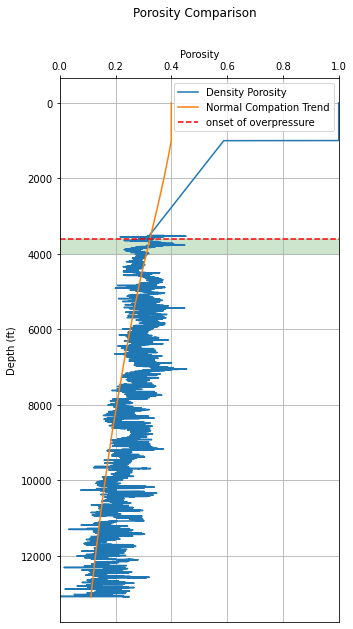

In [8]:
fig, ax = plt.subplots(figsize=(5, 10))
fig.suptitle('Porosity Comparison')
ax.plot(gom['Porosity (-)'], gom['Depth (ft)'], label='Density Porosity')
ax.plot(gom['Predicted porosity'], gom['Depth (ft)'], label='Normal Compation Trend')
ax.set_xlabel('Porosity')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_xlim(0, 1)
ax.set_ylabel('Depth (ft)')
ax.invert_yaxis()

ax.plot([0, 1], [3600, 3600], '--', color='red', label='onset of overpressure')
ax.fill_between([0, 1], 3600, 4000, color='green', alpha=0.2)

ax.grid()
ax.legend()
plt.show()

In [9]:
def pore_pressure(Sv, phi, phi_0=phi_0, beta=beta):
    return Sv + 1/beta * np.log(np.divide(phi,phi_0))

In [10]:
gom['Pore pressure (psi)'] = pore_pressure(gom['Overburden stress (psi)'], gom['Porosity (-)'])

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


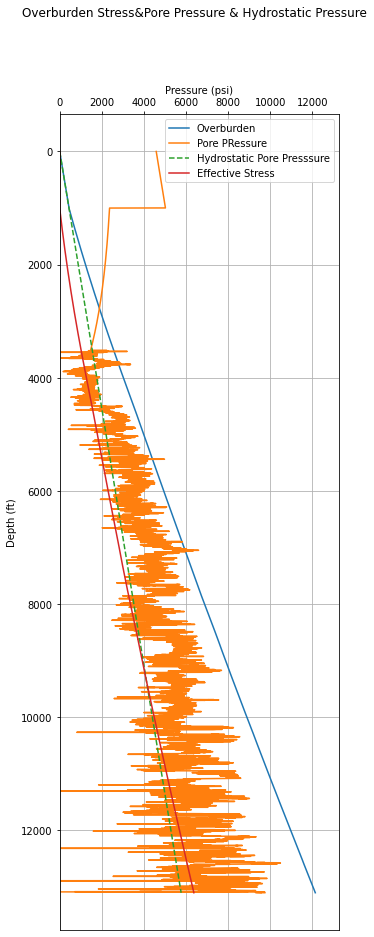

In [11]:
fig, ax = plt.subplots(figsize=(5, 15))
fig.suptitle('Overburden Stress&Pore Pressure & Hydrostatic Pressure')

ax.plot(gom['Overburden stress (psi)'], gom['Depth (ft)'], label='Overburden')
ax.plot(gom['Pore pressure (psi)'], gom['Depth (ft)'], label='Pore PRessure')
ax.plot(gom['Hydrostatic pore pressure (psi)'], gom['Depth (ft)'], '--', label='Hydrostatic Pore Presssure')
ax.plot(gom['Effective stress (psi)'], gom['Depth (ft)'], label='Effective Stress')
ax.set_xlabel('Pressure (psi)')
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
ax.set_ylabel('Depth (ft)')
ax.set_xlim(0, )
ax.invert_yaxis()
ax.grid()
ax.legend()
plt.show()